##### 8. On the `USArrests` data, calculate PVE in two ways: (a) Using the `explained_variance_ratio_` output of the fitted `PCA()` estimator, as was done in Section 12.2.3. (b) By applying `Equation 12.10` directly. The loadings are stored as the `components_` attribute of the fitted `PCA()` estimator. Use those loadings in `Equation 12.10` to obtain the PVE. These two approaches should give the same results.  Hint: You will only obtain the same results in (a) and (b) if the same data is used in both cases. For instance, if in (a) you performed `PCA()` using centered and scaled variables, then you must center and scale the variables before applying `Equation 12.10` in (b).

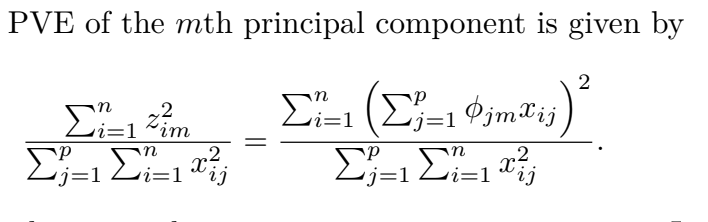

In [13]:
import numpy as np
import pandas as pd
from statsmodels.datasets import get_rdataset
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
df = get_rdataset('USArrests').data
df.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
df_stand = StandardScaler().fit_transform(df)

In [10]:
pca = PCA()
pca.fit_transform(df_stand)

array([[ 9.85565885e-01,  1.13339238e+00, -4.44268788e-01,
         1.56267145e-01],
       [ 1.95013775e+00,  1.07321326e+00,  2.04000333e+00,
        -4.38583440e-01],
       [ 1.76316354e+00, -7.45956781e-01,  5.47808243e-02,
        -8.34652924e-01],
       [-1.41420290e-01,  1.11979678e+00,  1.14573692e-01,
        -1.82810896e-01],
       [ 2.52398013e+00, -1.54293399e+00,  5.98556799e-01,
        -3.41996478e-01],
       [ 1.51456286e+00, -9.87555085e-01,  1.09500699e+00,
         1.46488703e-03],
       [-1.35864746e+00, -1.08892789e+00, -6.43257569e-01,
        -1.18469414e-01],
       [ 4.77093091e-02, -3.25358925e-01, -7.18632942e-01,
        -8.81977637e-01],
       [ 3.01304227e+00,  3.92285133e-02, -5.76829492e-01,
        -9.62847520e-02],
       [ 1.63928304e+00,  1.27894240e+00, -3.42460080e-01,
         1.07679681e+00],
       [-9.12657146e-01, -1.57046001e+00,  5.07818939e-02,
         9.02806864e-01],
       [-1.63979985e+00,  2.10972917e-01,  2.59801342e-01,
      

### a)

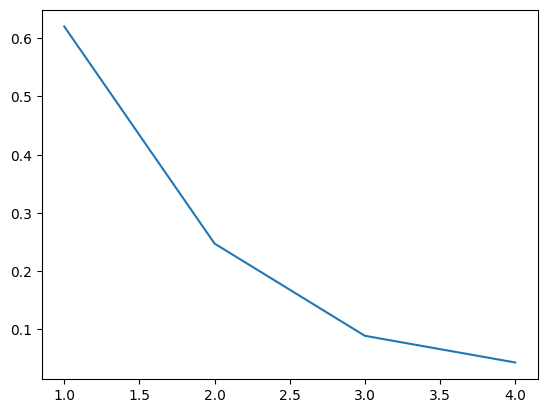

In [26]:
plt.plot(range(1, 5), pca.explained_variance_ratio_)

In [40]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

### b)

In [89]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [105]:
# loop through # of PC's
for m in range(0, pca.components_.shape[1]):

    # Numerator
    accum = 0
    num = 0

    # loop through samples
    for i in range(0, df_stand.shape[0]):

        # loop through predictors
        for j in range(0, df_stand.shape[1]):

            # sum the mth PC's jth sample * the ith sample and jth predictor of the data
            accum += pca.components_[m][j] * df_stand[i][j]
        
        # add the square of the sum of loads * x, reset accum for next sample sum
        num += accum**2
        accum=0
    
    # Denominator, sum the squared data
    den = np.sum(df_stand**2)

    print(f'PVE for PC {m+1}: {num/den}')


PVE for PC 1: 0.6200603947873738
PVE for PC 2: 0.2474412881349604
PVE for PC 3: 0.0891407951452075
PVE for PC 4: 0.04335752193245883
